In [1]:
#from ipsl_dcpp.model.ipsl_dataset import IPSL_DCPP
import torch
import lightning as pl
#from ipsl_dcpp.model.pangu import PanguWeather
from hydra import compose, initialize
from omegaconf import OmegaConf
import numpy as np
import hydra
import os
import pickle
import io
import numpy as np
from matplotlib import animation
import xarray as xr 
#os.environ['SLURM_NTASKS_PER_NODE'] = '1'
#torch.set_default_dtype(torch.float32)
# os.environ["CUDA_VISIBLE_DEVICES"]=""
#torch.set_default_tensor_type(torch.FloatTensor)

with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config")
pl.seed_everything(cfg.seed)
val = hydra.utils.instantiate(
    cfg.dataloader.dataset,domain='val'
)
val_loader = torch.utils.data.DataLoader(val, 
                                            batch_size=1,
                                            num_workers=0,
                                            shuffle=False) 


[rank: 0] Seed set to 0


torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])


56it [00:31,  1.79it/s]


In [5]:
batch = next(iter(val_loader))

2000-03
2000-02
torch.Size([10, 143, 144])
2 next_month_index
torch.Size([10, 143, 144])
torch.Size([10, 143, 144])
torch.Size([10, 143, 144])
torch.Size([10, 1, 1])
after delta torch.Size([10, 143, 144])


In [6]:
batch['time']

['2000-02']

In [7]:
import xarray as xr
sample = xr.open_dataset(val.files[0])

In [19]:
denormalized_batch = val.denormalize(batch)

/gpfsdswork/projects/rech/mlr/udy16au/ipsl_dcpp/ipsl_dcpp/model/ipsl_dataset.py:254: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /gpfs7kro/gpfslocalsup/src/pub/anaconda-py3/2023.09/pytorch-gpu-2.2.0+py3.11.7+cuda-12.2/pytorch-2.2.0/torch/csrc/utils/tensor_numpy.cpp:206.)
  denorm_surface = lambda x,month_index: x.to(device)*torch.from_numpy(self.surface_stds[month_index]).to(device) + torch.from_numpy(self.surface_means[month_index]).to(device)


In [20]:
shell = sample.isel(time=0)

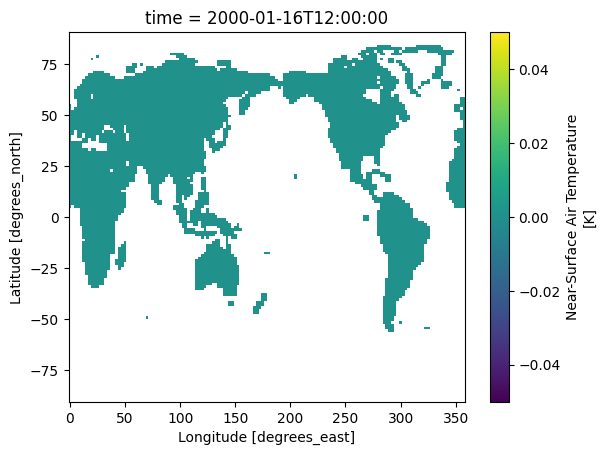

In [21]:
shell['tas'].data = (torch.from_numpy(sample.isel(time=2)['tas'].data) - denormalized_batch['next_state_surface'][0,0])
shell['tas'].plot()

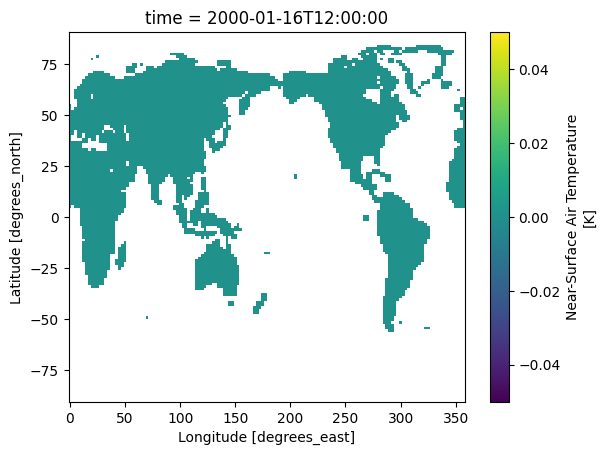

In [22]:
shell['tas'].data = (torch.from_numpy(sample.isel(time=1)['tas'].data) - denormalized_batch['state_surface'][0,0])
shell['tas'].plot()

In [12]:
batch['next_state_surface'].shape

torch.Size([1, 10, 143, 144])

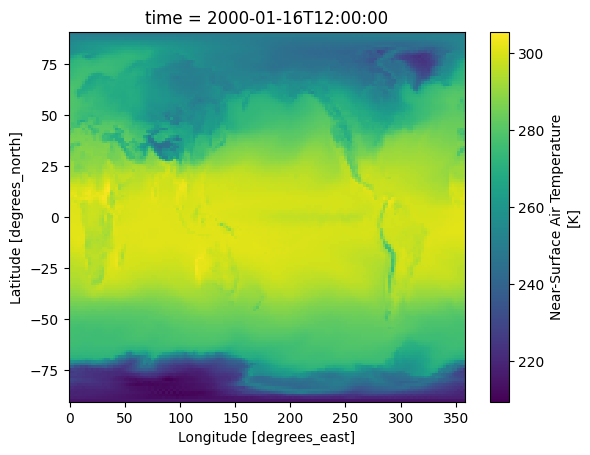

In [35]:
#CHECK DELTAS 
undeltaed = (batch['next_state_surface']*val.surface_delta_stds + batch['state_surface'])
unnormalized = (undeltaed*val.surface_stds[2]) + val.surface_means[2]
shell['tas'].data = unnormalized[0,0]
shell['tas'].plot()

In [11]:
normalized = ((sample.isel(time=1)['tas'].data - val.surface_means[1][0]) / val.surface_stds[1][0])
normalized_next = ((sample.isel(time=2)['tas'].data - val.surface_means[2][0]) / val.surface_stds[2][0])

In [18]:
val.surface_delta_stds[0].shape

torch.Size([1, 1])

In [12]:
delta = (normalized_next - normalized) / val.surface_delta_stds[0]

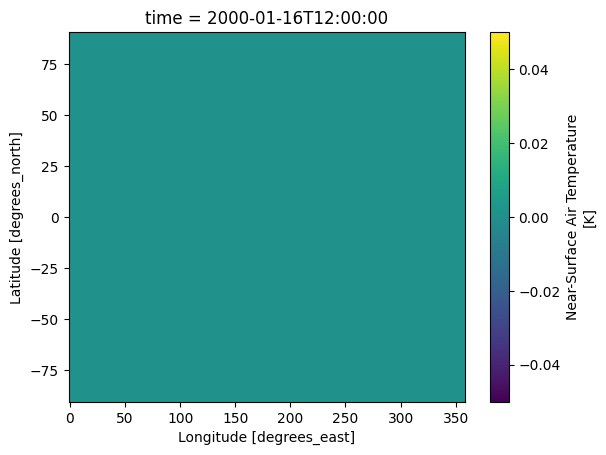

In [24]:
shell['tas'].data = torch.from_numpy(normalized) - batch['state_surface'][0,0]
shell['tas'].plot()

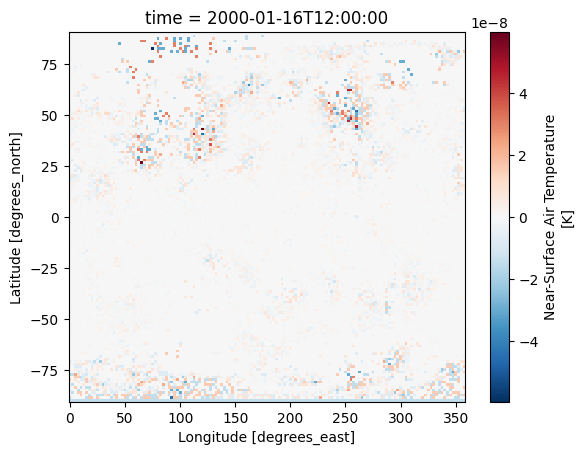

In [36]:
shell['tas'].data =torch.from_numpy(normalized_next) - undeltaed[0,0]
shell['tas'].plot()